In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
import statsmodels.api as sm
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import scipy.stats as stats
from scipy.stats import f
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
import dataframe_image as dfi
from matplotlib.patches import Rectangle

In [2]:
df = pd.read_csv("C:/Users/rifaz/Downloads/SalaryData.csv")

In [3]:
df.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


# 1.1 and 1.2 and 1.3

$𝐻_0$: Mean salary of the Education at three levels are same.<br>
$𝐻_𝐴$: Mean salary of the Education at three levels are NOT same.<br>



In [5]:
model = ols('Salary ~ C(Education)', data=df).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN

In [6]:
stats.f.ppf(1-.05, 2, 37)

3.251923846387207

Since the p value is less than the significance level, we can reject the null hupothesis and states that there is a difference in the mean salary with the different education levels.
Also, F statistic value is greater than F-significant value, hence reject  𝐻0


$𝐻_0$: Mean salary of the Occupation at four levels are same.<br>
$𝐻_𝐴$: Mean salary of the Occupation at four levels are NOT same.<br>

In [7]:
model = ols('Salary ~ C(Occupation)', data=df).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN

In [8]:
stats.f.ppf(1-.05, 3, 36)

2.86626555094018

Since the p value is greater than the significance level, there is no evidence to reject the null hupothesis and hence mean salary at different Occupation levels are same. Also, F statistic value is lesser than F-significant value, hence we cannot reject 𝐻0

# 1.4

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd #for importing library relevant for the Tukey's HSD
tukey = pairwise_tukeyhsd(endog=df['Salary'], groups=df['Education'], alpha=0.05) # endog is the continous dependent variable (distance in our case) and groups is the independent categorical variable (Design in our case)
print(tukey)#display results


           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


Above results from Tukey’s HSD suggests that all the pairwise comparisons for treatments rejects null hypothesis (p < 0.05) and indicates statistical significant differences among the salaries between the Education.

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd #for importing library relevant for the Tukey's HSD
tukey = pairwise_tukeyhsd(endog=df['Salary'], groups=df['Occupation'], alpha=0.05) # endog is the continous dependent variable (distance in our case) and groups is the independent categorical variable (Design in our case)
print(tukey)#display results
#what we see is the differences between means and and their significance 
#E.g Difference between means of Design 3 and Design 4 is 2.034 and is the only non-significant pair while other pairs have a significant difference between them


                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


# 1.5

In [11]:
# from statsmodels.formula.api import ols 
from statsmodels.graphics.factorplots import interaction_plot

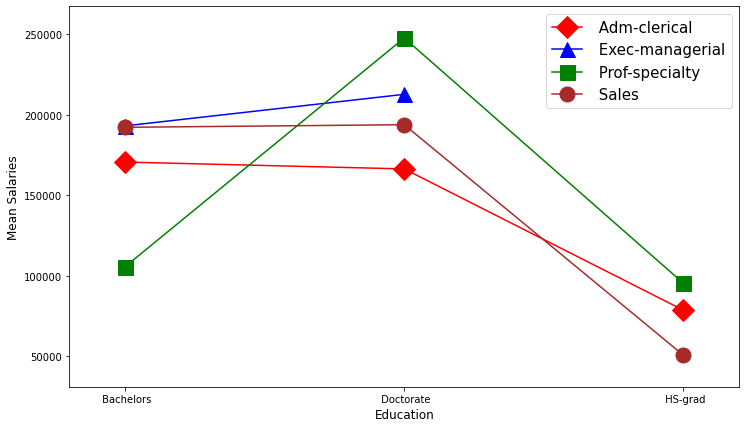

In [12]:
fig, ax = plt.subplots(figsize=(12, 7))
fig = interaction_plot(x=df['Education'], trace=df['Occupation'], response=df['Salary'],colors=['red', 'blue','green','brown'],markers=['D','^','s','o'],  ms=15, ax=ax)
plt.legend(prop={"size":15})
plt.xlabel('Education',fontsize=12)
plt.ylabel('Mean Salaries',fontsize=12)
plt.show()

# 1.6

$𝐻_0$: Interaction of both the Education & Occupation people of mean salaries are same.<br>
$𝐻_𝐴$: Interaction of both the Education & Occupation people of are NOT same.<br>

In [13]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN

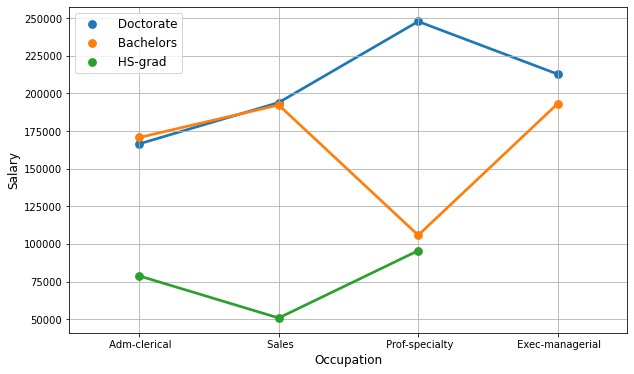

In [14]:
plt.figure(figsize=(10,6))
sns.pointplot(x ='Occupation', y = 'Salary',hue='Education',data=df,ci= None)
plt.grid()
plt.legend(prop={"size":12})
plt.xlabel('Occupation',fontsize=12)
plt.ylabel('Salary',fontsize=12)
plt.show()

In [15]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
# : represents "intercation/relation"
model = ols(formula,df).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN

Interaction between the Education and the Occupation significantly(P<0.05) affects the Salary from the above result.

In [16]:
formula = 'Salary ~ C(Occupation) + C(Education) + C(Occupation):C(Education)'
# : represents "intercation/relation"
model = ols(formula,df).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F  \
C(Occupation)                3.0  1.125878e+10  3.752928e+09   5.277862   
C(Education)                 2.0  9.695663e+10  4.847831e+10  68.176603   
C(Occupation):C(Education)   6.0  3.523330e+10  5.872217e+09   8.258287   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Occupation)               4.993238e-03  
C(Education)                1.090908e-11  
C(Occupation):C(Education)  2.913740e-05  
Residual                             NaN

# Problem 2

In [17]:
ddf = pd.read_csv("C:/Users/rifaz/Downloads/Education+-+Post+12th+Standard.csv")

In [18]:
ddf

Names   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University   1660    1232     721         23   
1                Adelphi University   2186    1924     512         16   
2                    Adrian College   1428    1097     336         22   
3               Agnes Scott College    417     349     137         60   
4         Alaska Pacific University    193     146      55         16   
..                              ...    ...     ...     ...        ...   
772         Worcester State College   2197    1515     543          4   
773               Xavier University   1959    1805     695         24   
774  Xavier University of Louisiana   2097    1915     695         34   
775                 Yale University  10705    2453    1317         95   
776    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
0           52         2885          537      7440        3300    450   
1           29         2683         1227     12280        6450    750   
2           50         1036           99     11250        3750    400   
3           89          510           63     12960        5450    450   
4           44          249          869      7560        4120    800   
..         ...          ...          ...       ...         ...    ...   
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        2200   70        78       18.1           12    7041         60  
1        1500   29        30       12.2           16   10527         56  
2        1165   53        66       12.9           30    8735         54  
3         875   92        97        7.7           37   19016         59  
4        1500   76        72       11.9            2   10922         15  
..        ...  ...       ...        ...          ...     ...        ...  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99  

[777 rows x 18 columns]

In [19]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [20]:
dups = ddf.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Education, Occupation, Salary]
Index: []

In [21]:
ddf.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [22]:
ddf.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [23]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(ddf[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(ddf[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=ddf[column])
    plt.show()

In [24]:
df_num = ddf.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

17

In [25]:
df_num.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 Distribution of Apps
----------------------------------------------------------------------------


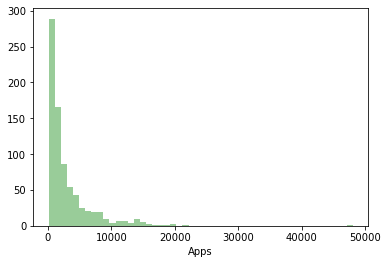

BoxPlot of Apps
----------------------------------------------------------------------------


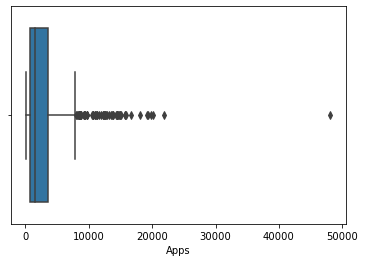

Description of Accept
----------------------------------------------------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64 Distribution of Accept
----------------------------------------------------------------------------


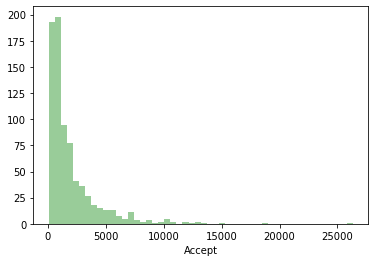

BoxPlot of Accept
----------------------------------------------------------------------------


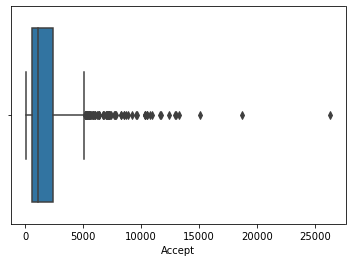

Description of Enroll
----------------------------------------------------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64 Distribution of Enroll
----------------------------------------------------------------------------


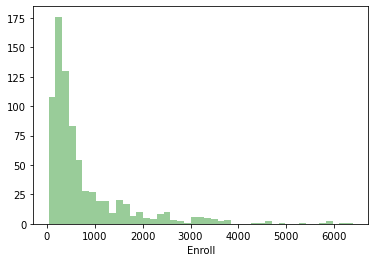

BoxPlot of Enroll
----------------------------------------------------------------------------


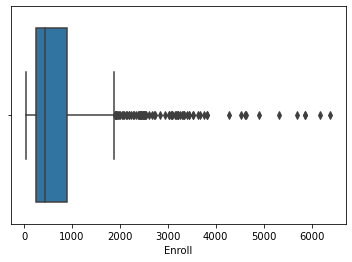

Description of Top10perc
----------------------------------------------------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64 Distribution of Top10perc
----------------------------------------------------------------------------


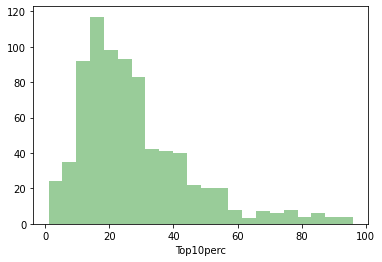

BoxPlot of Top10perc
----------------------------------------------------------------------------


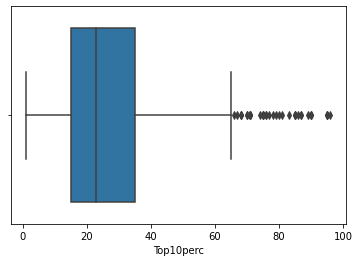

Description of Top25perc
----------------------------------------------------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64 Distribution of Top25perc
----------------------------------------------------------------------------


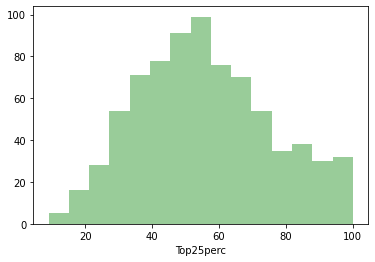

BoxPlot of Top25perc
----------------------------------------------------------------------------


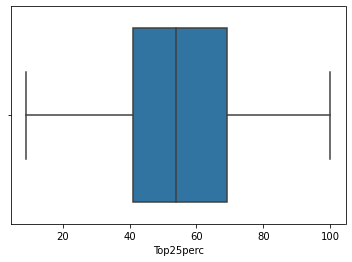

Description of F.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F.Undergrad, dtype: float64 Distribution of F.Undergrad
----------------------------------------------------------------------------


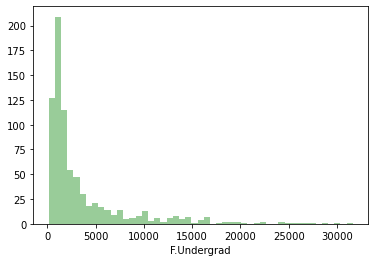

BoxPlot of F.Undergrad
----------------------------------------------------------------------------


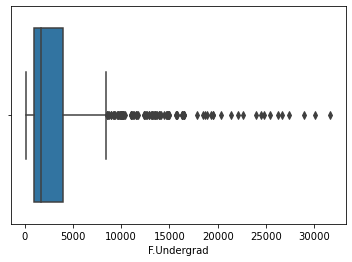

Description of P.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P.Undergrad, dtype: float64 Distribution of P.Undergrad
----------------------------------------------------------------------------


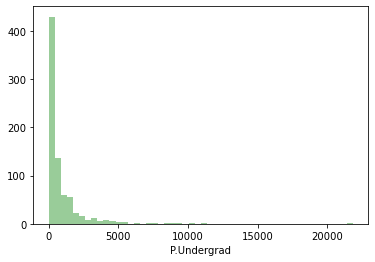

BoxPlot of P.Undergrad
----------------------------------------------------------------------------


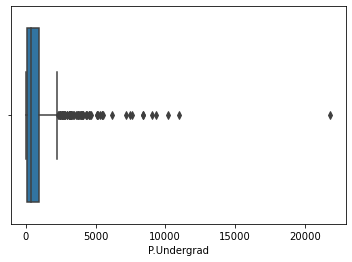

Description of Outstate
----------------------------------------------------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64 Distribution of Outstate
----------------------------------------------------------------------------


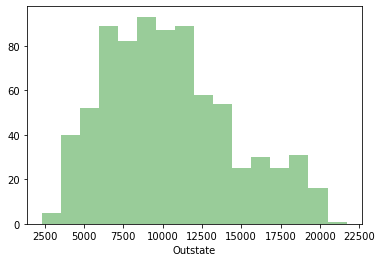

BoxPlot of Outstate
----------------------------------------------------------------------------


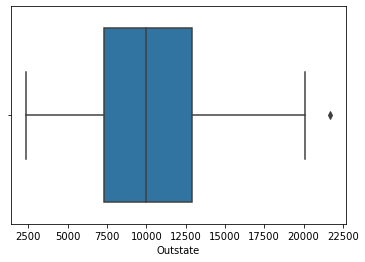

Description of Room.Board
----------------------------------------------------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64 Distribution of Room.Board
----------------------------------------------------------------------------


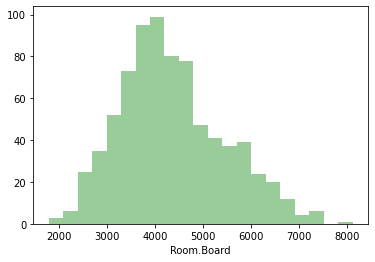

BoxPlot of Room.Board
----------------------------------------------------------------------------


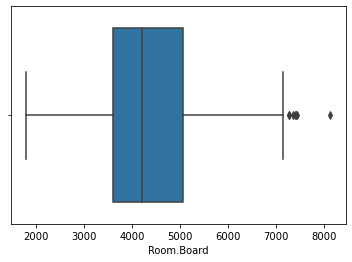

Description of Books
----------------------------------------------------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64 Distribution of Books
----------------------------------------------------------------------------


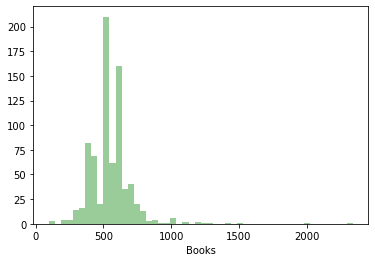

BoxPlot of Books
----------------------------------------------------------------------------


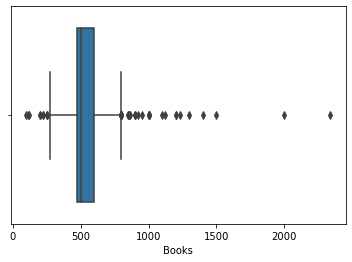

Description of Personal
----------------------------------------------------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64 Distribution of Personal
----------------------------------------------------------------------------


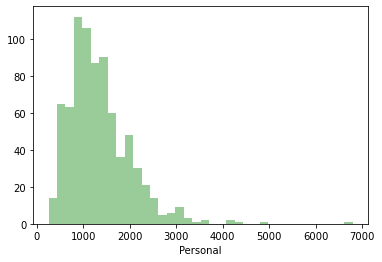

BoxPlot of Personal
----------------------------------------------------------------------------


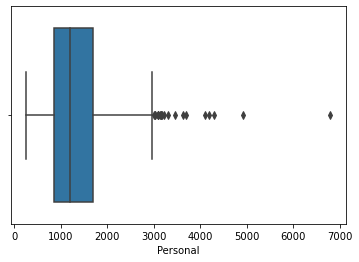

Description of PhD
----------------------------------------------------------------------------
count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64 Distribution of PhD
----------------------------------------------------------------------------


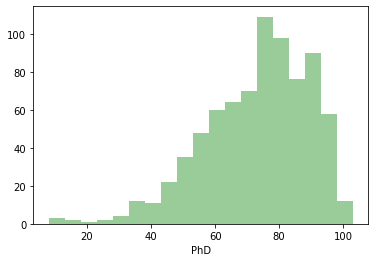

BoxPlot of PhD
----------------------------------------------------------------------------


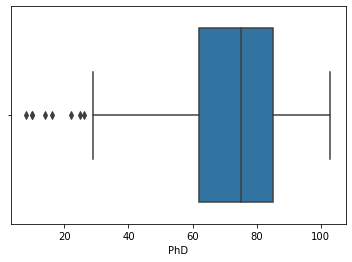

Description of Terminal
----------------------------------------------------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64 Distribution of Terminal
----------------------------------------------------------------------------


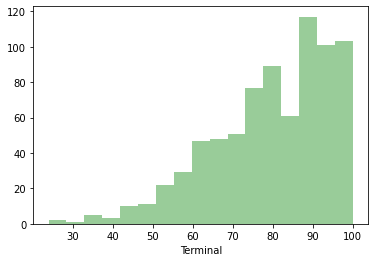

BoxPlot of Terminal
----------------------------------------------------------------------------


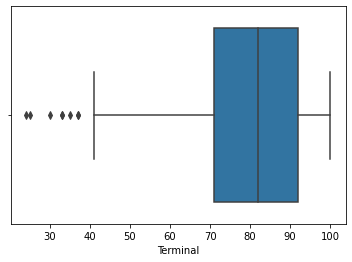

Description of S.F.Ratio
----------------------------------------------------------------------------
count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S.F.Ratio, dtype: float64 Distribution of S.F.Ratio
----------------------------------------------------------------------------


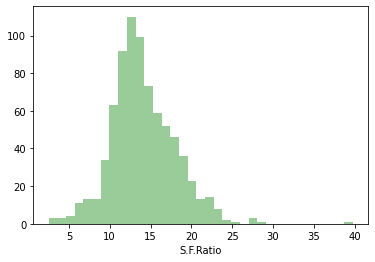

BoxPlot of S.F.Ratio
----------------------------------------------------------------------------


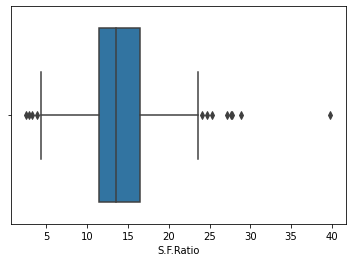

Description of perc.alumni
----------------------------------------------------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64 Distribution of perc.alumni
----------------------------------------------------------------------------


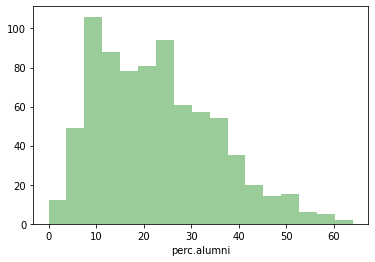

BoxPlot of perc.alumni
----------------------------------------------------------------------------


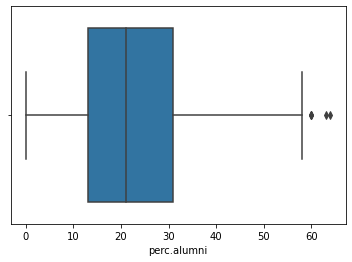

Description of Expend
----------------------------------------------------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64 Distribution of Expend
----------------------------------------------------------------------------


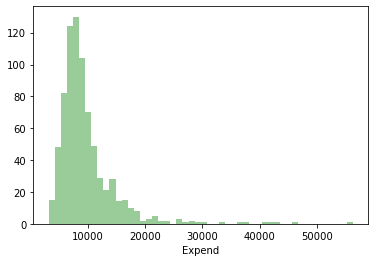

BoxPlot of Expend
----------------------------------------------------------------------------


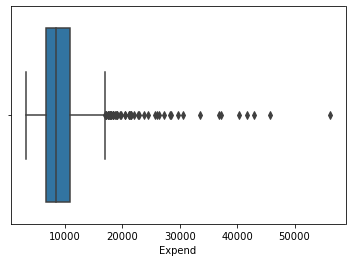

Description of Grad.Rate
----------------------------------------------------------------------------
count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64 Distribution of Grad.Rate
----------------------------------------------------------------------------


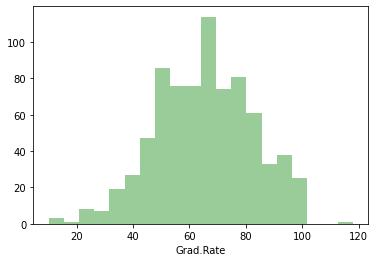

BoxPlot of Grad.Rate
----------------------------------------------------------------------------


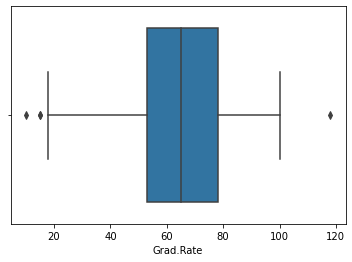

In [26]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)


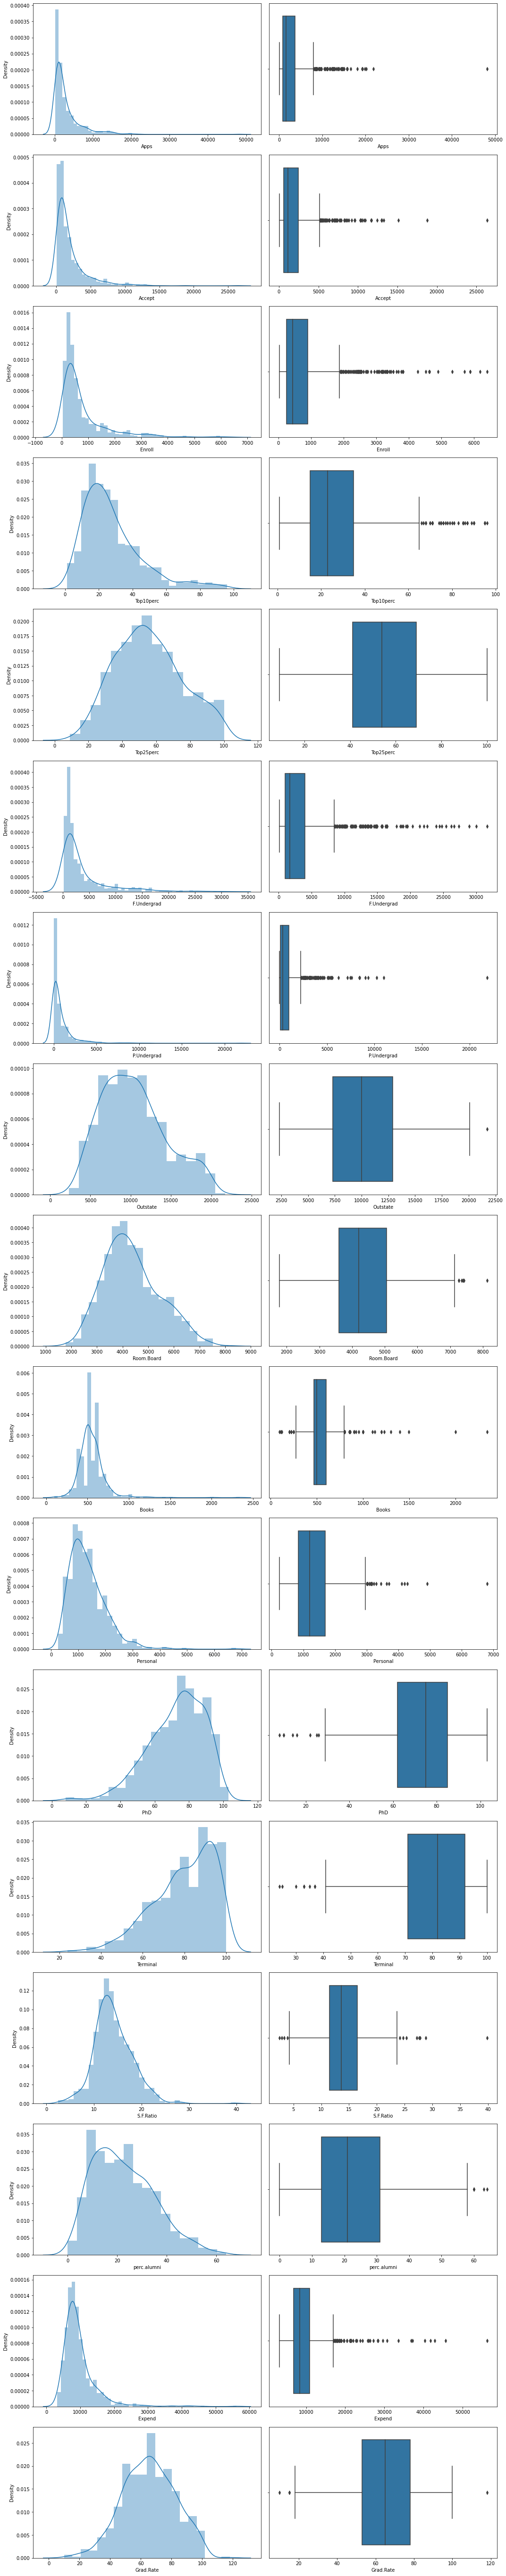

In [27]:
a=1
plt.figure(figsize=(15,80))
for i in df_num.columns:
    if df_num[i].dtype != 'object':
        plt.subplot(18,2,a)
        sns.distplot(df_num[i])
#         plt.title("Histogram for:" + i)
        plt.subplot(18,2,a+1)
        sns.boxplot(df_num[i])
#         plt.title("Boxplot for:" + i)
        a+=2
    plt.tight_layout()
        

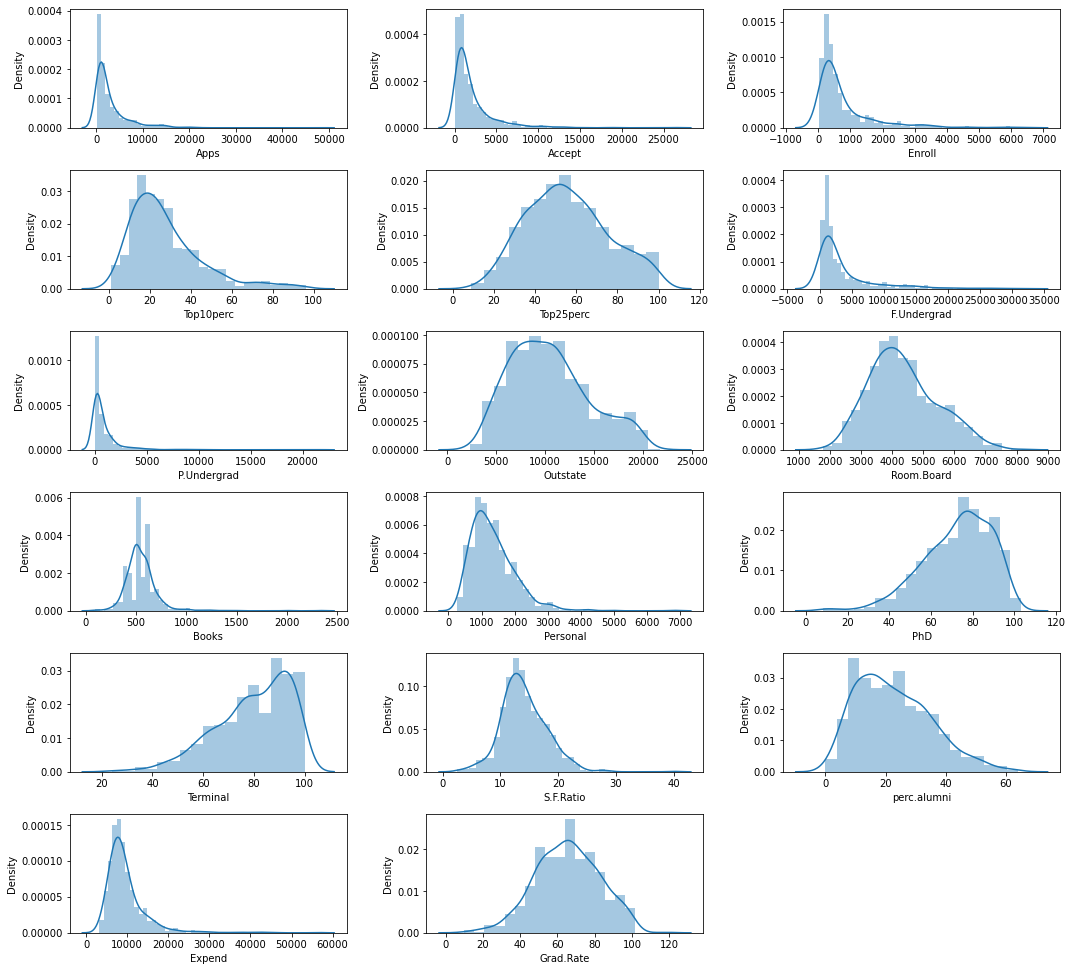

In [28]:
a=1
plt.figure(figsize=(15,40))
for i in df_num.columns:
    if df_num[i].dtype != 'object':
        plt.subplot(18,3,a)
        sns.distplot(df_num[i])
# #         plt.title("Histogram for:" + i)
#         plt.subplot(18,2,a+1)
#         sns.boxplot(df_num[i])
# #         plt.title("Boxplot for:" + i)
        a+=1
    plt.tight_layout()
        

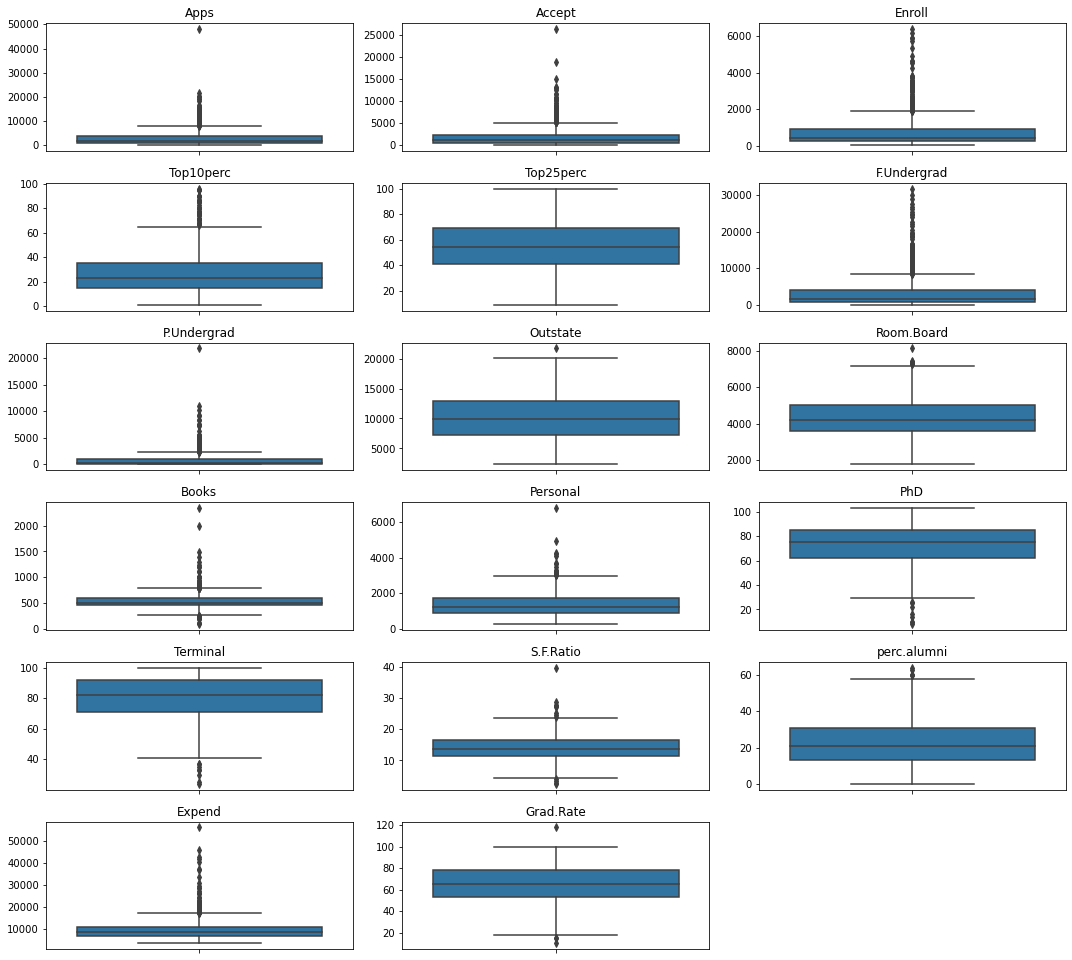

In [29]:
a=1
plt.figure(figsize=(15,40))
for i in df_num.columns:
    if df_num[i].dtype != 'object':
#         plt.subplot(18,3,a)
#         sns.distplot(df_num[i])
# #         plt.title("Histogram for:" + i)
        plt.subplot(18,3,a)
        sns.boxplot(y=df_num[i])
        plt.title(i)
        a+=1
        plt.ylabel('')
        plt.tight_layout()
        

In [30]:
corr = df_num.corr(method='pearson')

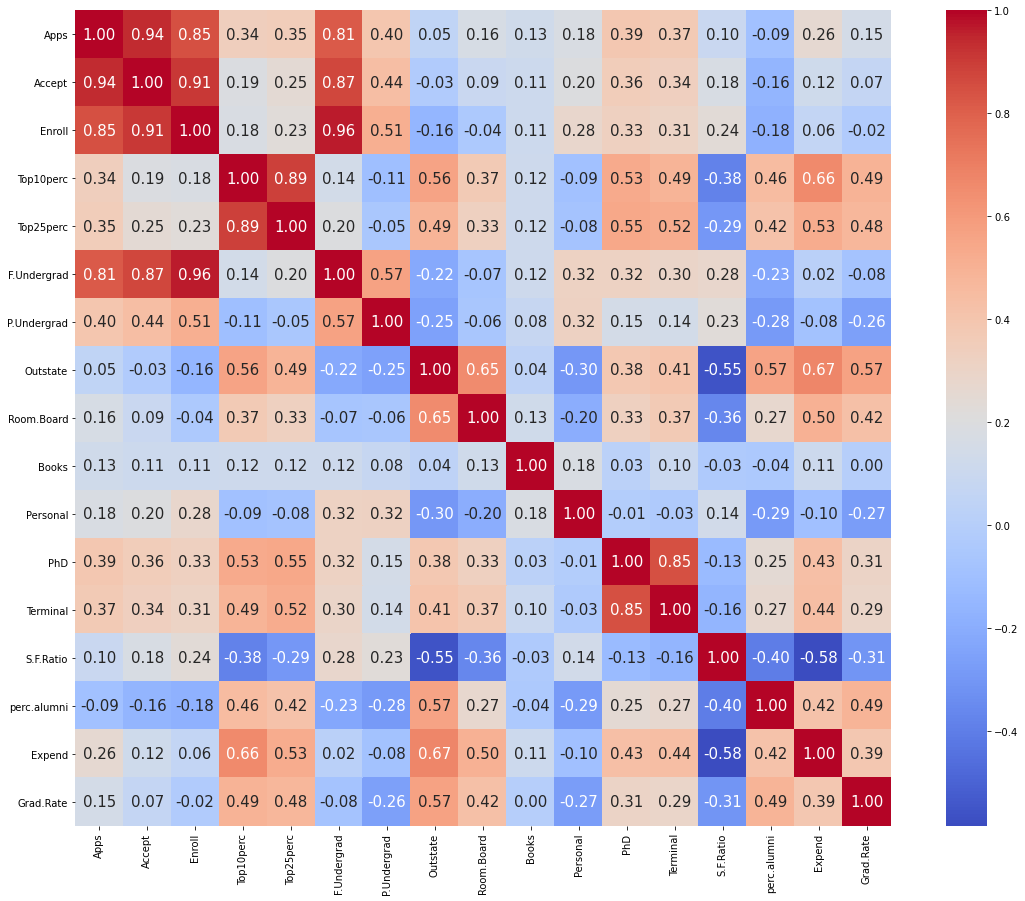

In [31]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(20, 15))
sns.heatmap(df_num.corr(),cmap='coolwarm',annot=True,fmt='.2f',annot_kws={'size': 15},square=True)
plt.show()

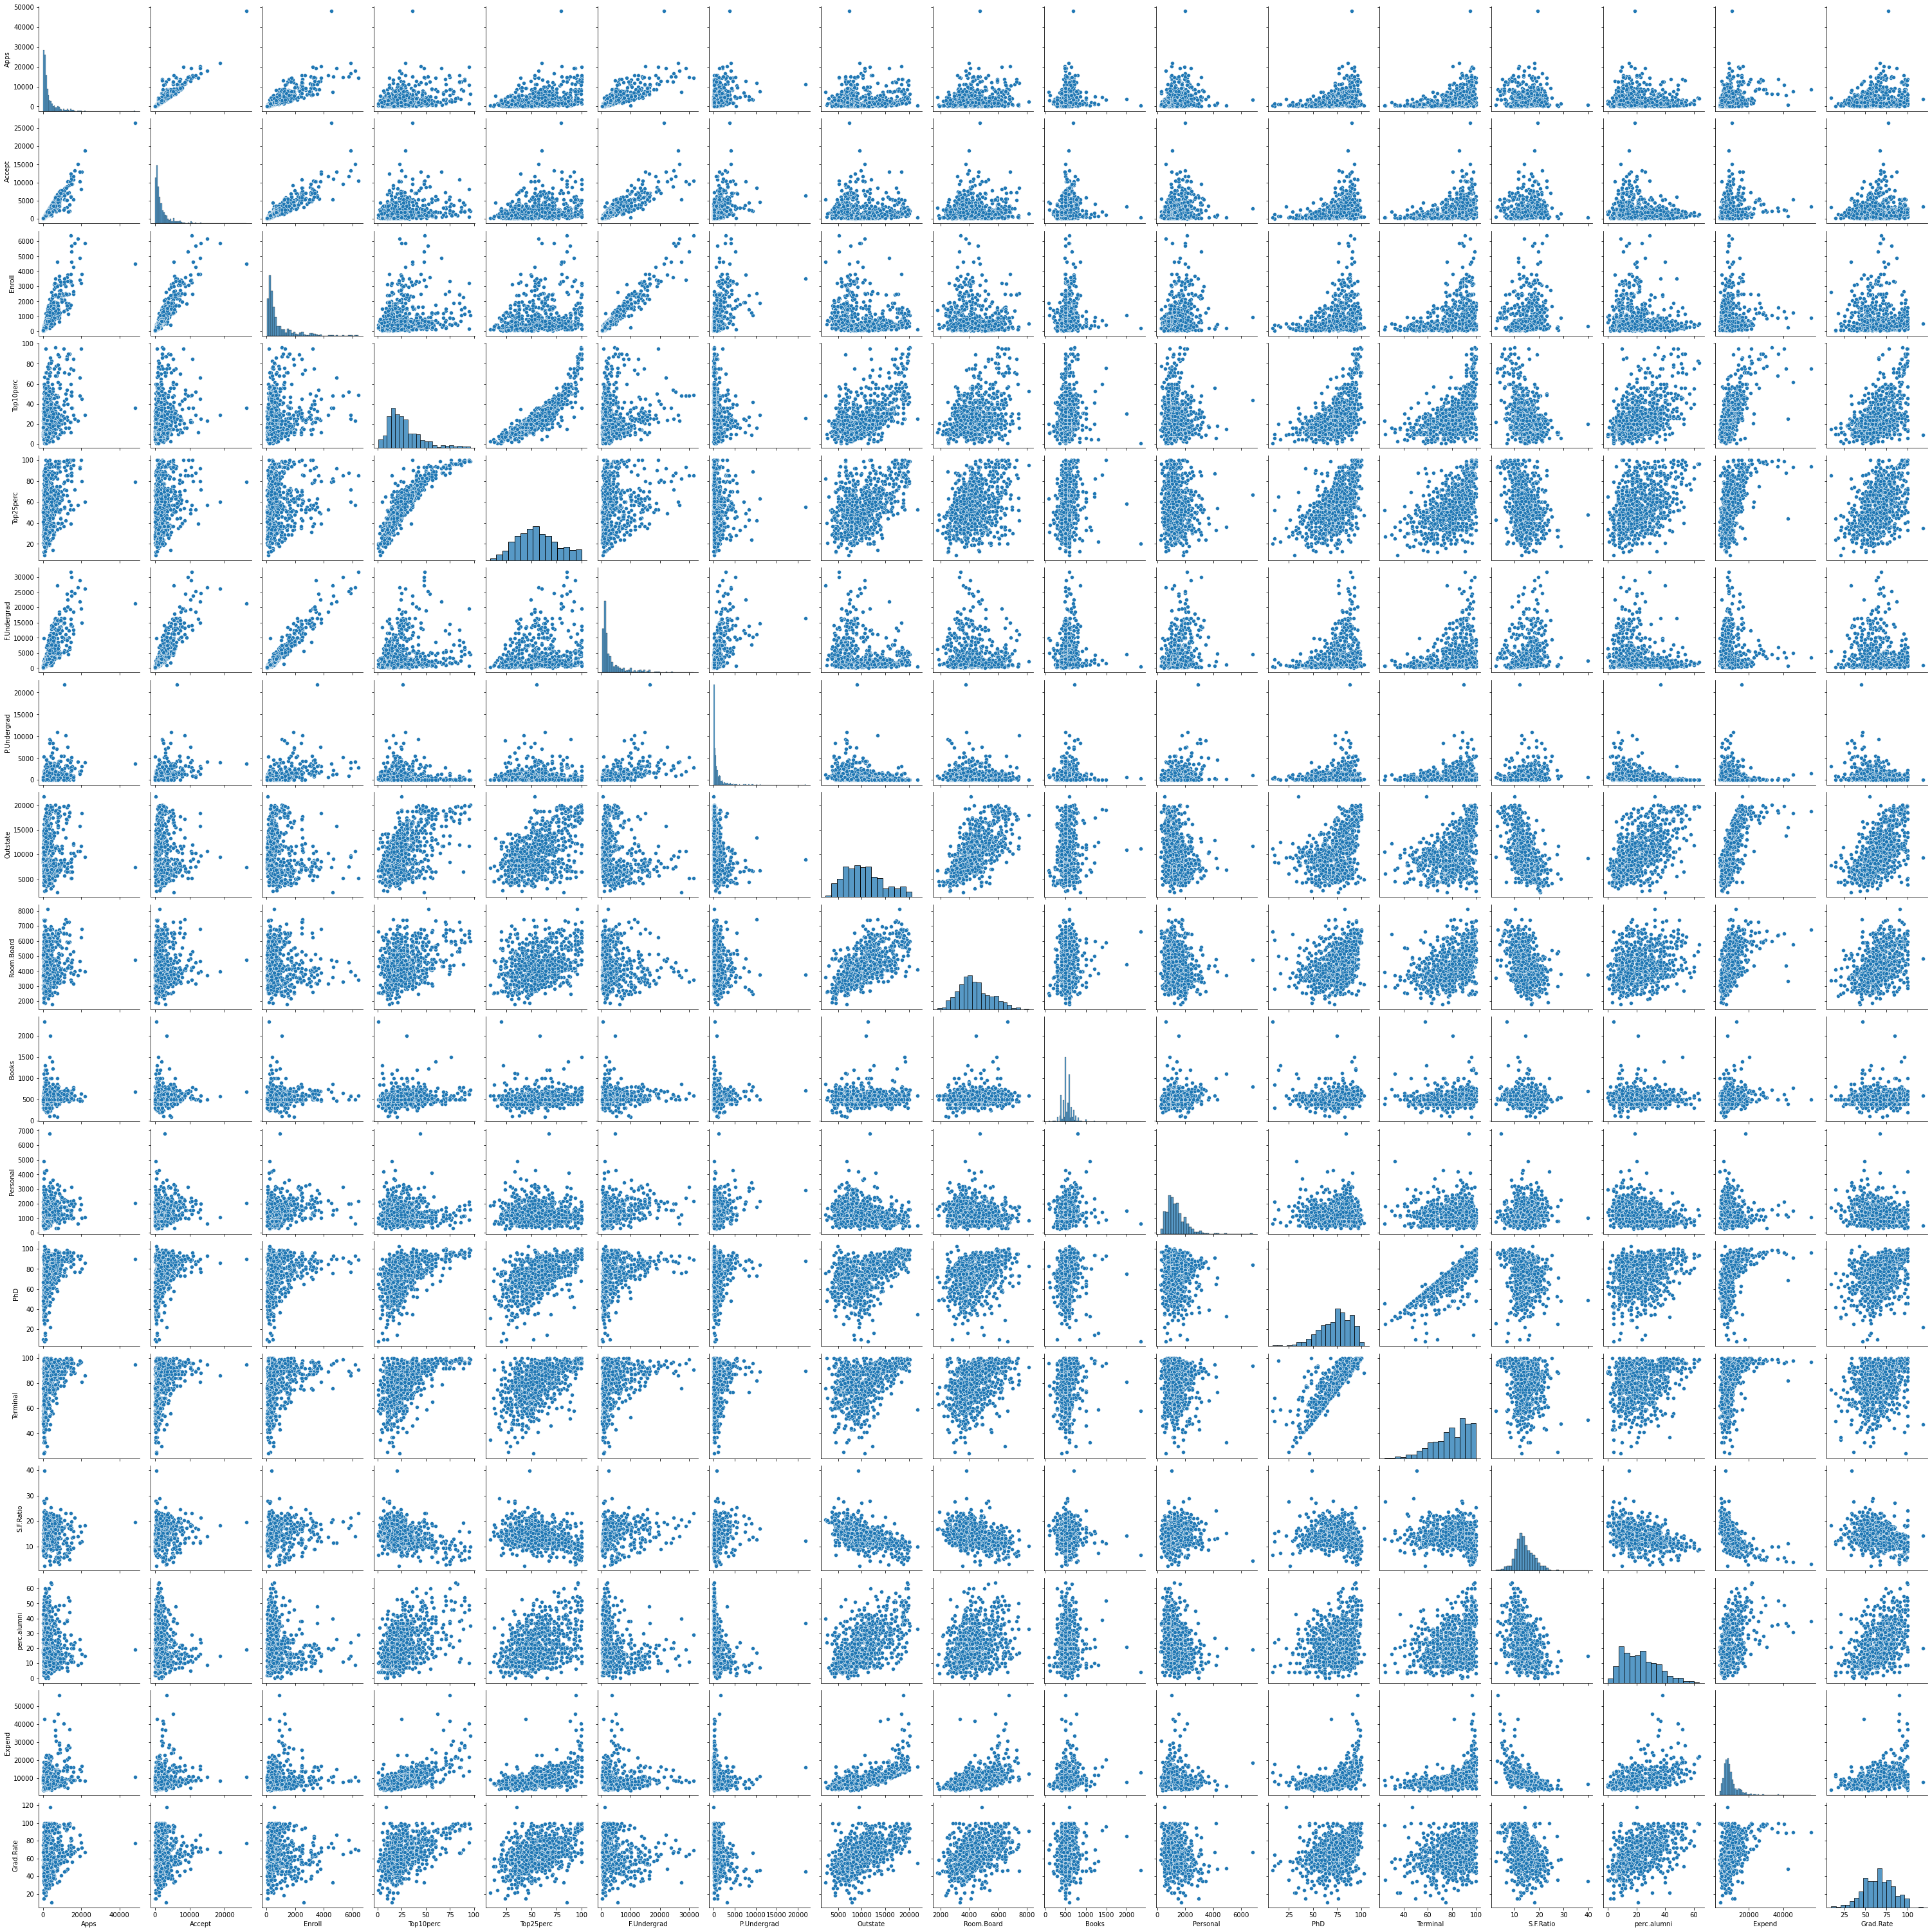

In [32]:
sns.pairplot(ddf)
plt.show()

In [33]:
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [34]:
dfi.export(df_num_scaled.head(), 'dataframe2.png')

In [35]:
df_num_scaled.describe().T

count          mean       std       min       25%       50%  \
Apps         777.0  6.355797e-17  1.000644 -0.755134 -0.575441 -0.373254   
Accept       777.0  6.774575e-17  1.000644 -0.794764 -0.577581 -0.371011   
Enroll       777.0 -5.249269e-17  1.000644 -0.802273 -0.579351 -0.372584   
Top10perc    777.0 -2.753232e-17  1.000644 -1.506526 -0.712380 -0.258583   
Top25perc    777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad  777.0 -1.661405e-16  1.000644 -0.734617 -0.558643 -0.411138   
P.Undergrad  777.0 -3.029180e-17  1.000644 -0.561502 -0.499719 -0.330144   
Outstate     777.0  6.515595e-17  1.000644 -2.014878 -0.776203 -0.112095   
Room.Board   777.0  3.570717e-16  1.000644 -2.351778 -0.693917 -0.143730   
Books        777.0 -2.192583e-16  1.000644 -2.747779 -0.481099 -0.299280   
Personal     777.0  4.765243e-17  1.000644 -1.611860 -0.725120 -0.207855   
PhD          777.0  5.954768e-17  1.000644 -3.962596 -0.653295  0.143389   
Terminal     777.0 -4.481615e-16  1.000644 -3.785982 -0.591502  0.156142   
S.F.Ratio    777.0 -2.057556e-17  1.000644 -2.929799 -0.654660 -0.123794   
perc.alumni  777.0 -6.022638e-17  1.000644 -1.836580 -0.786824 -0.140820   
Expend       777.0  1.213101e-16  1.000644 -1.240641 -0.557483 -0.245893   
Grad.Rate    777.0  3.886495e-16  1.000644 -3.230876 -0.726019 -0.026990   

                  75%        max  
Apps         0.160912  11.658671  
Accept       0.165417   9.924816  
Enroll       0.131413   6.043678  
Top10perc    0.422113   3.882319  
Top25perc    0.667104   2.233391  
F.Undergrad  0.062941   5.764674  
P.Undergrad  0.073418  13.789921  
Outstate     0.617927   2.800531  
Room.Board   0.631824   3.436593  
Books        0.306784  10.852297  
Personal     0.531095   8.068387  
PhD          0.756222   1.859323  
Terminal     0.835818   1.379560  
S.F.Ratio    0.609307   6.499390  
perc.alumni  0.666685   3.331452  
Expend       0.224174   8.924721  
Grad.Rate    0.730293   3.060392

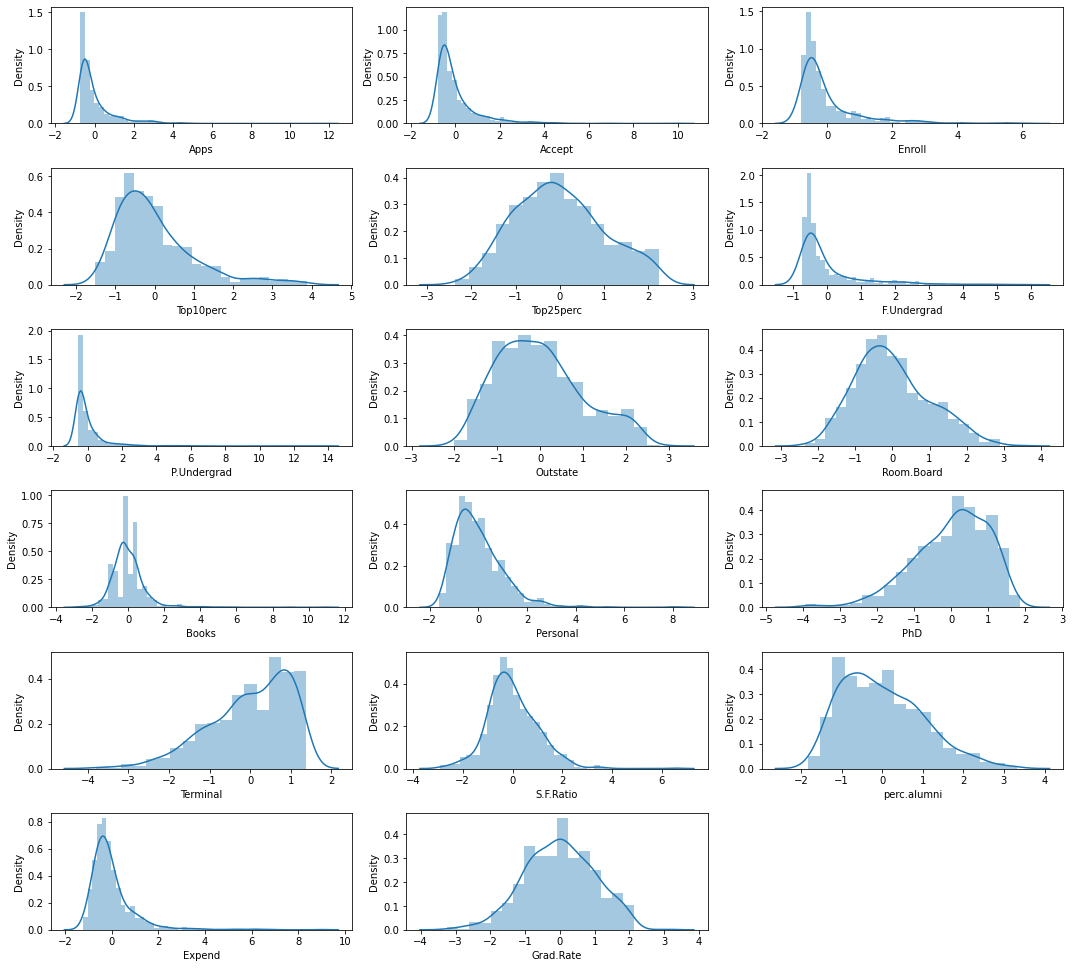

In [36]:
b=1
plt.figure(figsize=(15,40))
for j in df_num_scaled.columns:
#     if df_num_scaled[j].dtype != 'object':
        plt.subplot(18,3,b)
        sns.distplot(df_num_scaled[j])
        b+=1
        plt.tight_layout()
        

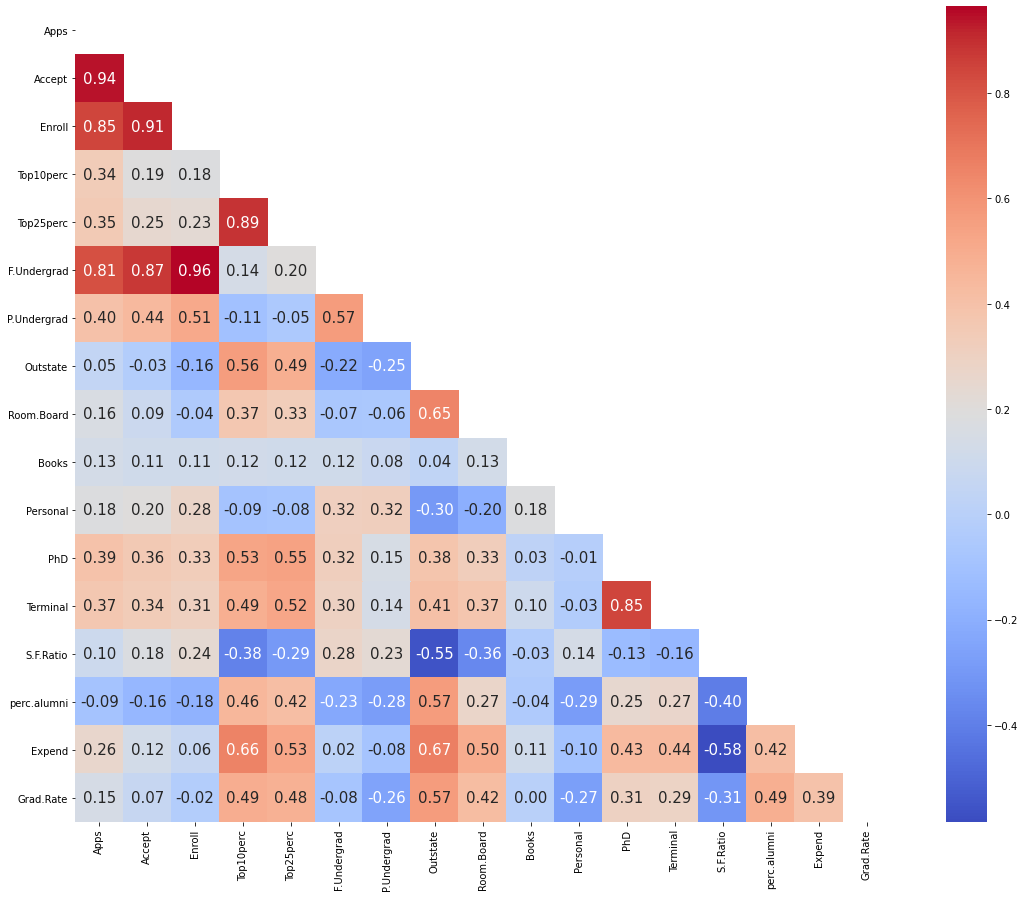

In [37]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
plt.figure(figsize = (20,15))
# sns.heatmap(df_num_scaled.corr(), annot=True,fmt='.2f',cmap='Blues',mask=mask,annot_kws={'size': 15},square=True);
sns.heatmap(df_num_scaled.corr(),cmap='coolwarm',annot=True,fmt='.2f',mask=mask,annot_kws={'size': 15},square=True)
plt.show()

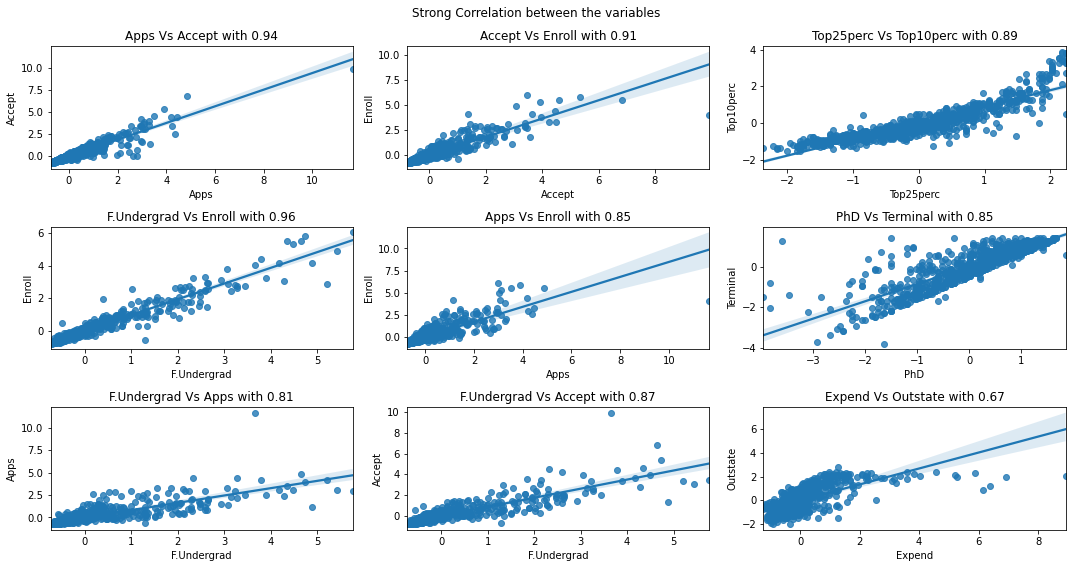

In [38]:
# df_num_scaled.cov()
# sns.pairplot(df_num_scaled[('Apps','Accept')])
# sns.pairplot(df_num_scaled,vars=['Apps','Accept','Enroll','F.Undergrad','PhD','Terminal'])
# sns.lmplot(x='Apps',y='Accept',data=df_num_scaled)
fig, axes = plt.subplots(3, 3, figsize=(15, 8))
fig.suptitle('Strong Correlation between the variables')
sns.regplot(ax=axes[0, 0], data=df_num_scaled, x='Apps',y='Accept')
axes[0,0].set_title('Apps Vs Accept with 0.94')
sns.regplot(ax=axes[0, 1], data=df_num_scaled,x='Accept',y='Enroll')
axes[0,1].set_title('Accept Vs Enroll with 0.91')
sns.regplot(ax=axes[0, 2], data=df_num_scaled,x='Top25perc',y='Top10perc')
axes[0,2].set_title('Top25perc Vs Top10perc with 0.89')
sns.regplot(ax=axes[1, 0], data=df_num_scaled,x='F.Undergrad',y='Enroll')
axes[1,0].set_title('F.Undergrad Vs Enroll with 0.96')
sns.regplot(ax=axes[1, 1], data=df_num_scaled,x='Apps',y='Enroll')
axes[1,1].set_title('Apps Vs Enroll with 0.85')
sns.regplot(ax=axes[1, 2], data=df_num_scaled,x='PhD',y='Terminal')
axes[1,2].set_title('PhD Vs Terminal with 0.85')
sns.regplot(ax=axes[2, 0], data=df_num_scaled,x='F.Undergrad',y='Apps')
axes[2,0].set_title('F.Undergrad Vs Apps with 0.81')
sns.regplot(ax=axes[2, 1], data=df_num_scaled,x='F.Undergrad',y='Accept')
axes[2,1].set_title('F.Undergrad Vs Accept with 0.87')
sns.regplot(ax=axes[2, 2], data=df_num_scaled,x='Expend',y='Outstate')
axes[2,2].set_title('Expend Vs Outstate with 0.67')
plt.tight_layout()     
        
# sns.lmplot(x='S.F.Ratio',y='Outstate',data=df_num_scaled)
# sns.scatterplot(x='S.F.Ratio',y='Outstate',data=df_num_scaled)
plt.show()
# sns.pairplot(test, hue="A", vars=["B", "C", "D"])

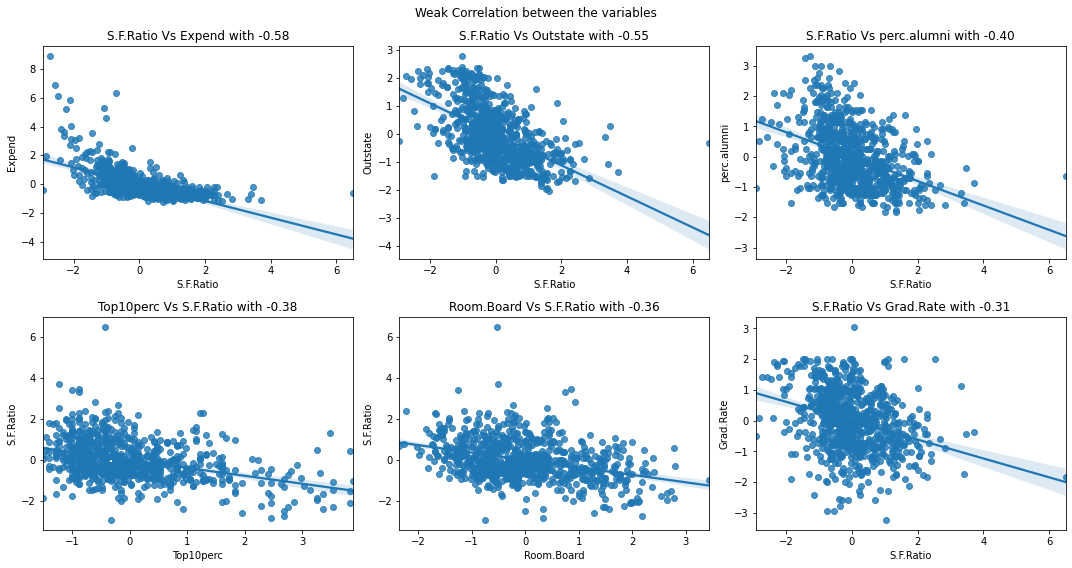

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Weak Correlation between the variables')
sns.regplot(ax=axes[0, 0], data=df_num_scaled, x='S.F.Ratio',y='Expend')
axes[0,0].set_title('S.F.Ratio Vs Expend with -0.58')
sns.regplot(ax=axes[0, 1], data=df_num_scaled,x='S.F.Ratio',y='Outstate')
axes[0,1].set_title('S.F.Ratio Vs Outstate with -0.55')
sns.regplot(ax=axes[0, 2], data=df_num_scaled,x='S.F.Ratio',y='perc.alumni')
axes[0,2].set_title('S.F.Ratio Vs perc.alumni with -0.40')
sns.regplot(ax=axes[1, 0], data=df_num_scaled,x='Top10perc',y='S.F.Ratio')
axes[1,0].set_title('Top10perc Vs S.F.Ratio with -0.38')
sns.regplot(ax=axes[1, 1], data=df_num_scaled,x='Room.Board',y='S.F.Ratio')
axes[1,1].set_title('Room.Board Vs S.F.Ratio with -0.36')
sns.regplot(ax=axes[1, 2], data=df_num_scaled,x='S.F.Ratio',y='Grad.Rate')
axes[1,2].set_title('S.F.Ratio Vs Grad.Rate with -0.31')
plt.tight_layout()    

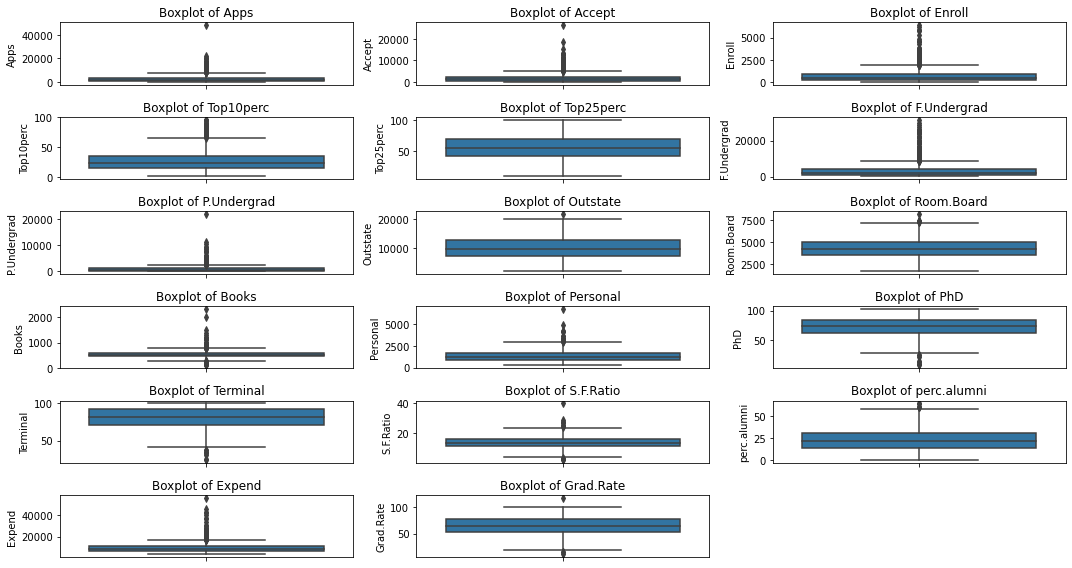

In [40]:
#Check for presence of outliers in each feature
plt.figure(figsize = (15,8))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

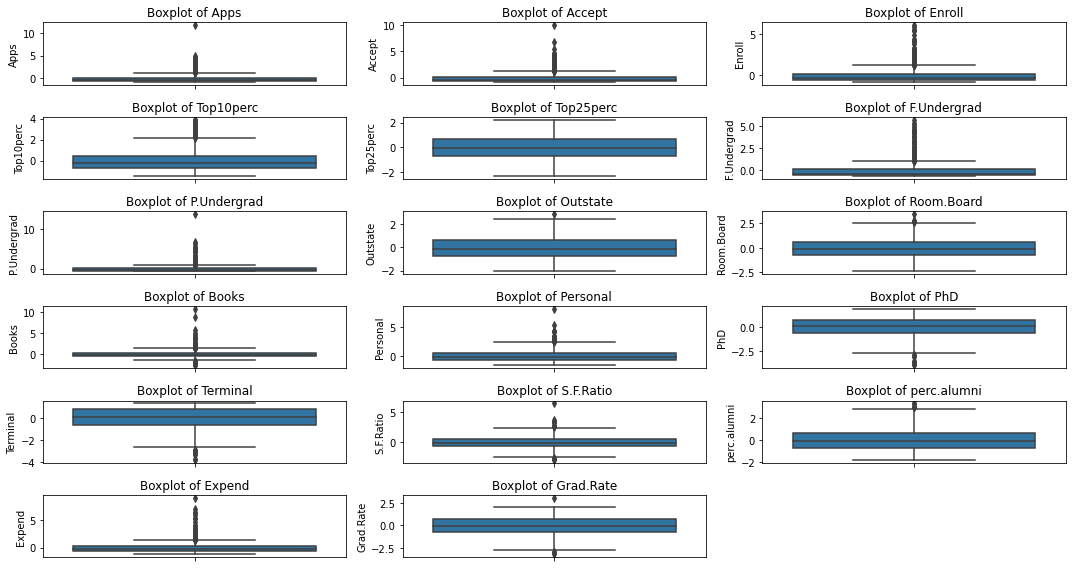

In [41]:
#Check for presence of outliers in each feature
plt.figure(figsize = (15,8))
feature_list = df_num_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(y = df_num_scaled[feature_list[i]], data = df_num_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [42]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

0.0

In [43]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

0.8131251200373505

In [44]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca_transformed = pca.fit_transform(df_num_scaled)

In [45]:
#Extract eigen vectors
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [46]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [47]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13','PC14','PC15','PC16','PC17'],
                                    index = df_num_scaled.columns)

In [48]:
df_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                  PC7       PC8       PC9      PC10      PC11      PC12  \
Apps        -0.042486 -0.103090 -0.090227  0.052510  0.043046  0.024071   
Accept      -0.012950 -0.056271 -0.177865  0.041140 -0.058406 -0.145102   
Enroll      -0.027693  0.058662 -0.128561  0.034488 -0.069399  0.011143   
Top10perc   -0.161332 -0.122678  0.341100  0.064026 -0.008105  0.038554   
Top25perc   -0.118486 -0.102492  0.403712  0.014549 -0.273128 -0.089352   
F.Undergrad -0.025076  0.078890 -0.059442  0.020847 -0.081158  0.056177   
P.Undergrad  0.061042  0.570784  0.560673 -0.223106  0.100693 -0.063536   
Outstate     0.108529  0.009846 -0.004573  0.186675  0.143221 -0.823444   
Room.Board   0.209744 -0.221453  0.275023  0.298324 -0.359322  0.354560   
Books       -0.149692  0.213293 -0.133663 -0.082029  0.031940 -0.028159   
Personal     0.633790 -0.232661 -0.094469  0.136028 -0.018578 -0.039264   
PhD         -0.001096 -0.077040 -0.185182 -0.123452  0.040372  0.023222   
Terminal    -0.028477 -0.012161 -0.254938 -0.088578 -0.058973  0.016485   
S.F.Ratio    0.219259 -0.083605  0.274544  0.472045  0.445001 -0.011026   
perc.alumni  0.243321  0.678524 -0.255335  0.423000 -0.130728  0.182661   
Expend      -0.226584 -0.054159 -0.049139  0.132286  0.692089  0.325982   
Grad.Rate    0.559944 -0.005336  0.041904 -0.590271  0.219839  0.122107   

                 PC13      PC14      PC15      PC16      PC17  
Apps         0.595831  0.080633  0.133406  0.459139  0.358970  
Accept       0.292642  0.033467 -0.145498 -0.518569 -0.543427  
Enroll      -0.444638 -0.085697  0.029590 -0.404318  0.609651  
Top10perc    0.001023 -0.107828  0.697723 -0.148739 -0.144986  
Top25perc    0.021884  0.151742 -0.617275  0.051868  0.080348  
F.Undergrad -0.523622 -0.056373  0.009916  0.560363 -0.414705  
P.Undergrad  0.125998  0.019286  0.020952 -0.052731  0.009018  
Outstate    -0.141856 -0.034012  0.038354  0.101595  0.050900  
Room.Board  -0.069749 -0.058429  0.003402 -0.025929  0.001146  
Books        0.011438 -0.066849 -0.009439  0.002883  0.000773  
Personal     0.039455  0.027529 -0.003090 -0.012890 -0.001114  
PhD          0.127696 -0.691126 -0.112056  0.029808  0.013813  
Terminal    -0.058313  0.671009  0.158910 -0.027076  0.006209  
S.F.Ratio   -0.017715  0.041374 -0.020899 -0.021248 -0.002222  
perc.alumni  0.104088 -0.027154 -0.008418  0.003334 -0.019187  
Expend      -0.093746  0.073123 -0.227742 -0.043880 -0.035310  
Grad.Rate   -0.069197  0.036477 -0.003394 -0.005008 -0.013071

In [49]:
dfi.export(df_extracted_loadings, 'dataframe.png')

In [50]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

In [51]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

In [52]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var

array([ 32.02,  58.36,  65.26,  71.18,  76.67,  81.65,  85.21,  88.66,
        91.78,  94.16,  96.  ,  97.3 ,  98.29,  99.14,  99.66,  99.88,
       100.02])

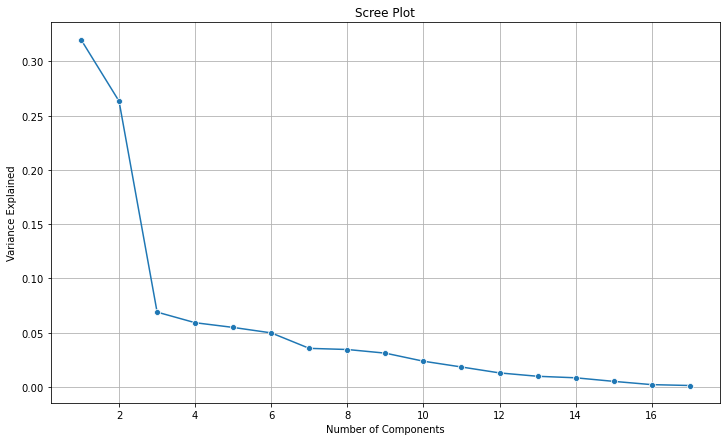

In [53]:
#Create a scree plot
plt.figure(figsize=(12,7))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,18),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

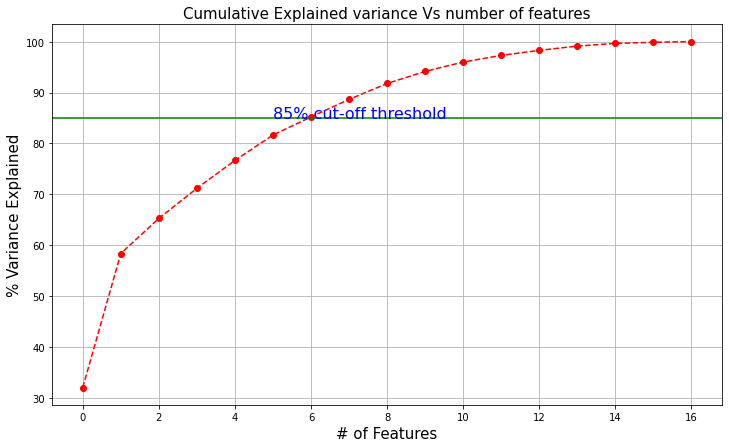

In [54]:
plt.figure(figsize=(12,7))
plt.plot(var, marker='o',linestyle='--',color='red')
plt.ylabel('% Variance Explained',fontsize=15)
plt.xlabel('# of Features',fontsize=15)
plt.title('Cumulative Explained variance Vs number of features',fontsize=15)
plt.axhline(y=85, color='g', linestyle='-')
plt.text(5, 85, '85% cut-off threshold', color = 'blue', fontsize=16)
plt.grid()
plt.show()

In [55]:
# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 17 to 7)

pca = PCA(n_components = 7) # Instanciating
pca_final = pca.fit_transform(df_num_scaled)
pca_final

array([[-1.59285540e+00,  7.67333510e-01, -1.01073537e-01, ...,
        -7.43975398e-01, -2.98306081e-01,  6.38443468e-01],
       [-2.19240180e+00, -5.78829984e-01,  2.27879812e+00, ...,
         1.05999660e+00, -1.77137309e-01,  2.36753302e-01],
       [-1.43096371e+00, -1.09281889e+00, -4.38092811e-01, ...,
        -3.69613274e-01, -9.60591689e-01, -2.48276091e-01],
       ...,
       [-7.32560596e-01, -7.72352397e-02, -4.05641899e-04, ...,
        -5.16021118e-01,  4.68014248e-01, -1.31749158e+00],
       [ 7.91932735e+00, -2.06832886e+00,  2.07356368e+00, ...,
        -9.47754745e-01, -2.06993738e+00,  8.33276555e-02],
       [-4.69508066e-01,  3.66660943e-01, -1.32891515e+00, ...,
        -1.13217594e+00,  8.39893087e-01,  1.30731260e+00]])

In [56]:
# PCA Loadings
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

In [57]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871])

In [58]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var 

array([32.02, 58.36, 65.26, 71.18, 76.67, 81.65, 85.21])

In [59]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6','PC7']]

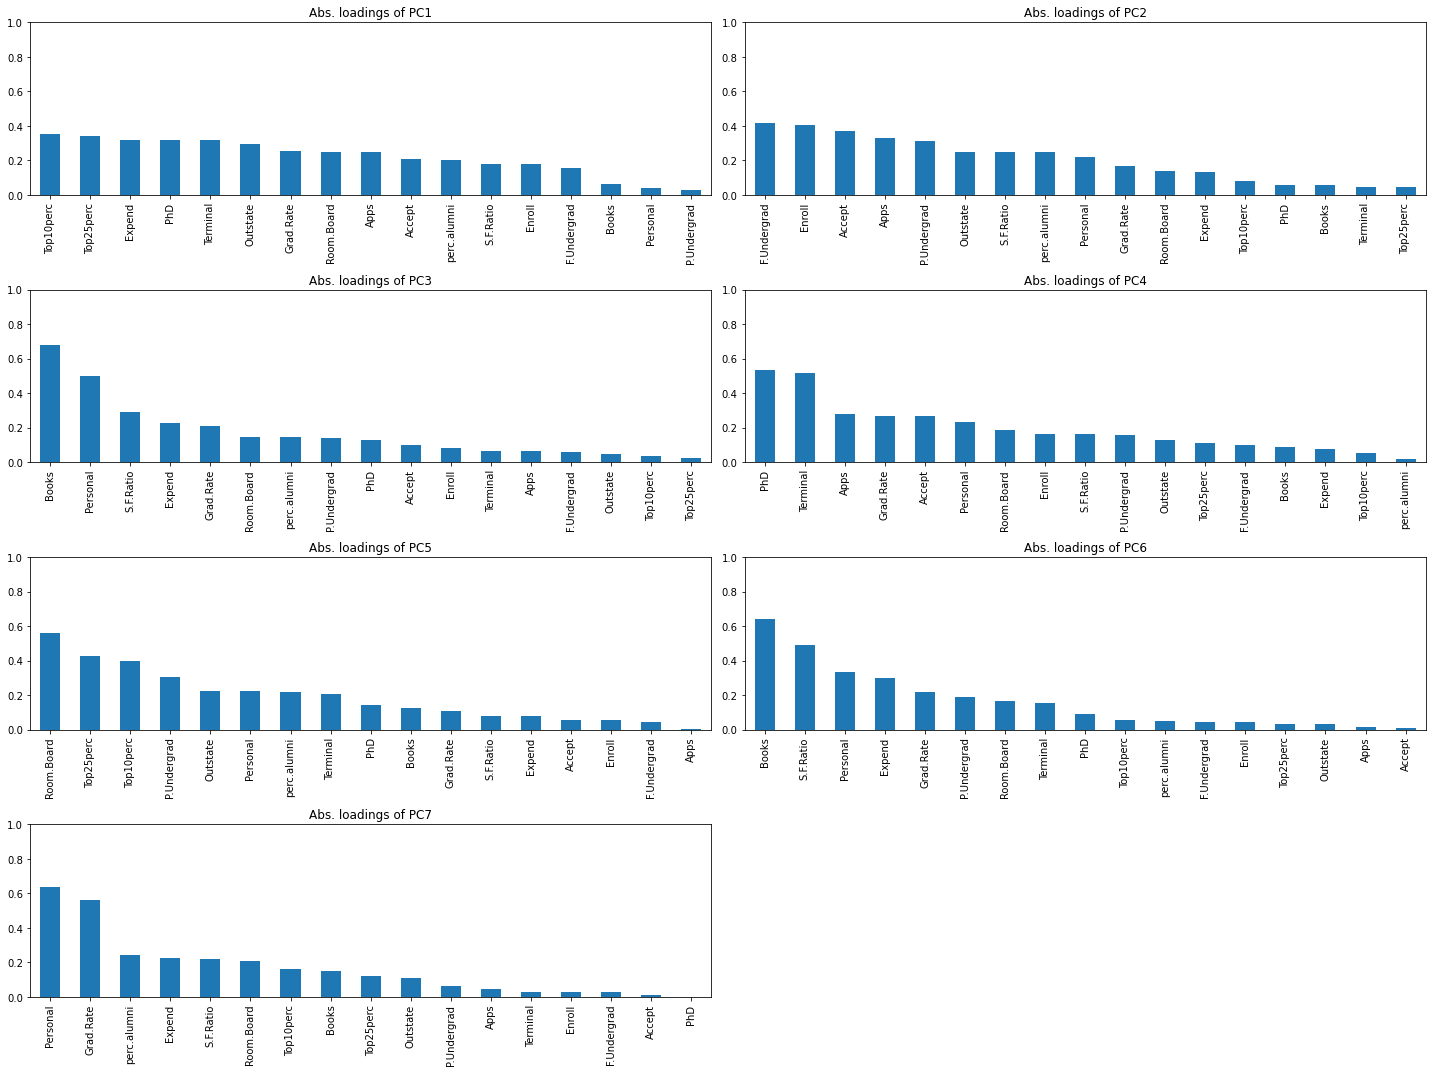

In [60]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (20,15))
for i in range(len(df_selected.columns)):
    plt.subplot(4,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

In [61]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 34 and the first row of the dataframe below
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306  0.638443
1 -2.192402 -0.578830  2.278798  3.588918  1.059997 -0.177137  0.236753
2 -1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592 -0.248276
3  2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059508 -1.249356
4 -2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918 -2.159220
5 -0.571665 -1.496325  0.024354  0.066944 -0.376261 -0.668344 -1.609835
6  0.241952 -1.506368  0.234194 -1.142024  1.546983 -0.009995  0.590933
7  1.750474 -1.461412 -1.026589 -0.981184  0.217044  0.222924  0.038169
8  0.769127 -1.984433 -1.426052 -0.071424  0.586380 -0.655179 -0.213314
9 -2.770721 -0.844611  1.627987  1.705091 -1.019826 -0.794401 -0.317891

In [62]:
df_comp = pd.DataFrame(pca.components_,columns=list(df_num_scaled))
df_comp

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   
5 -0.016237  0.007535 -0.042558  -0.052693   0.033092    -0.043454   
6 -0.042486 -0.012950 -0.027693  -0.161332  -0.118486    -0.025076   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   
5    -0.191199 -0.030000    0.162755  0.641055 -0.331398  0.091256  0.154928   
6     0.061042  0.108529    0.209744 -0.149692  0.633790 -0.001096 -0.028477   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161189     0.017314  0.079273   0.269129  
4  -0.079388    -0.216297  0.075958  -0.109268  
5   0.487046    -0.047340 -0.298119   0.216163  
6   0.219259     0.243321 -0.226584   0.559944

In [63]:
dfi.export(df_comp, 'dataframe1.png')

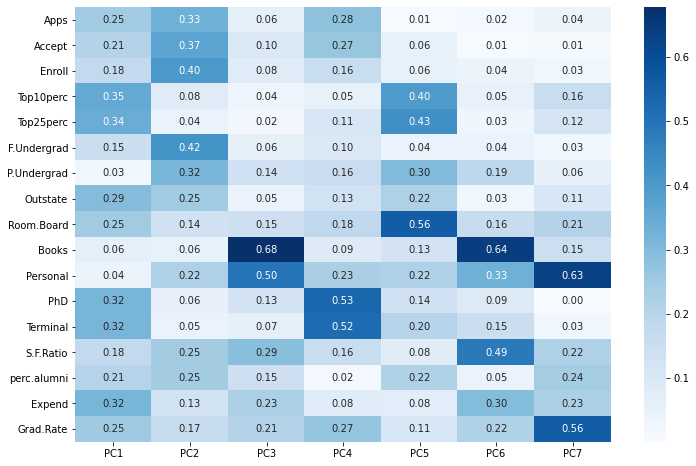

In [64]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

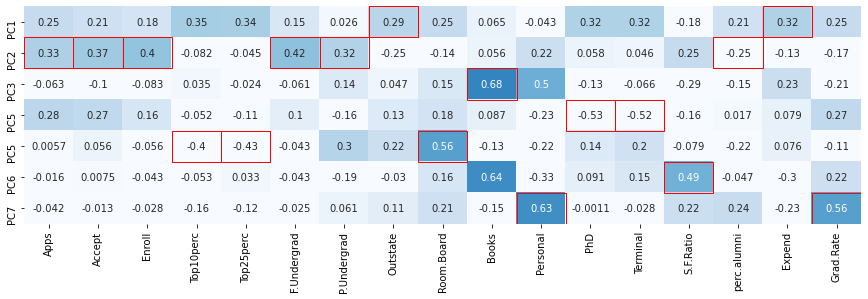

In [65]:
fig, ax = plt.subplots(figsize=(15,4), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_comp, annot=True, vmax=1, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                yticklabels=['PC1','PC2','PC3','PC5','PC5','PC6','PC7'])

column_max = df_comp.abs().idxmax(axis=0)

for col, variable in enumerate(df_comp.columns):
    position = df_comp.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position), 1, 1, fill=False, edgecolor='red', lw=1))

In [66]:
pca_final_df.columns=['Expenditures','Admission','Books/Supplies','Faculties','Accomodation','Pupil-Teacher Ratio','Students Budget']
pca_final_df.head(10)

Expenditures  Admission  Books/Supplies  Faculties  Accomodation  \
0     -1.592855   0.767334       -0.101074  -0.921749     -0.743975   
1     -2.192402  -0.578830        2.278798   3.588918      1.059997   
2     -1.430964  -1.092819       -0.438093   0.677241     -0.369613   
3      2.855557  -2.630612        0.141722  -1.295486     -0.183837   
4     -2.212008   0.021631        2.387030  -1.114538      0.684451   
5     -0.571665  -1.496325        0.024354   0.066944     -0.376261   
6      0.241952  -1.506368        0.234194  -1.142024      1.546983   
7      1.750474  -1.461412       -1.026589  -0.981184      0.217044   
8      0.769127  -1.984433       -1.426052  -0.071424      0.586380   
9     -2.770721  -0.844611        1.627987   1.705091     -1.019826   

   Pupil-Teacher Ratio  Students Budget  
0            -0.298306         0.638443  
1            -0.177137         0.236753  
2            -0.960592        -0.248276  
3            -1.059508        -1.249356  
4             0.004918        -2.159220  
5            -0.668344        -1.609835  
6            -0.009995         0.590933  
7             0.222924         0.038169  
8            -0.655179        -0.213314  
9            -0.794401        -0.317891

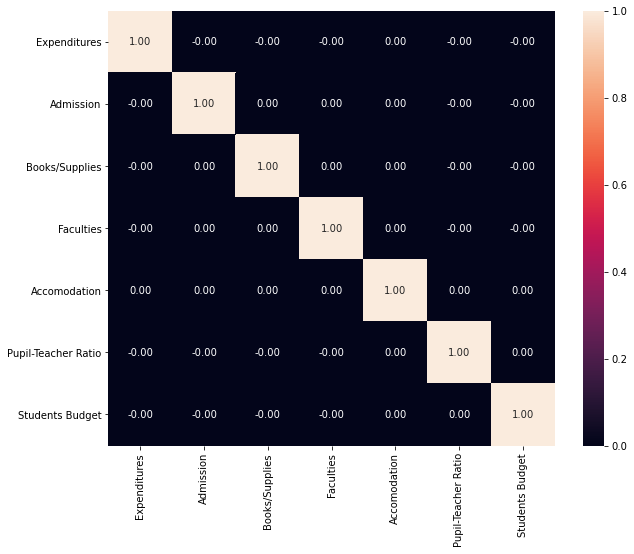

In [67]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

In [68]:
cov_matrix = np.cov(df_num_scaled.T).T
# print('Covariance Matrix \n', cov_matrix)

In [69]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n', np.round(eig_vals,2))
print('\n')
print('Eigen Vectors \n', np.round(eig_vecs,2))


 Eigen Values 
 [5.45 4.48 1.17 1.01 0.93 0.85 0.61 0.59 0.53 0.4  0.02 0.04 0.31 0.09
 0.14 0.17 0.22]


Eigen Vectors 
 [[-0.25  0.33  0.06 -0.28  0.01  0.02  0.04  0.1   0.09 -0.05  0.36 -0.46
   0.04 -0.13  0.08 -0.6   0.02]
 [-0.21  0.37  0.1  -0.27  0.06 -0.01  0.01  0.06  0.18 -0.04 -0.54  0.52
  -0.06  0.15  0.03 -0.29 -0.15]
 [-0.18  0.4   0.08 -0.16 -0.06  0.04  0.03 -0.06  0.13 -0.03  0.61  0.4
  -0.07 -0.03 -0.09  0.44  0.01]
 [-0.35 -0.08 -0.04  0.05 -0.4   0.05  0.16  0.12 -0.34 -0.06 -0.14  0.15
  -0.01 -0.7  -0.11 -0.    0.04]
 [-0.34 -0.04  0.02  0.11 -0.43 -0.03  0.12  0.1  -0.4  -0.01  0.08 -0.05
  -0.27  0.62  0.15 -0.02 -0.09]
 [-0.15  0.42  0.06 -0.1  -0.04  0.04  0.03 -0.08  0.06 -0.02 -0.41 -0.56
  -0.08 -0.01 -0.06  0.52  0.06]
 [-0.03  0.32 -0.14  0.16  0.3   0.19 -0.06 -0.57 -0.56  0.22  0.01  0.05
   0.1  -0.02  0.02 -0.13 -0.06]
 [-0.29 -0.25 -0.05 -0.13  0.22  0.03 -0.11 -0.01  0.   -0.19  0.05 -0.1
   0.14 -0.04 -0.03  0.14 -0.82]
 [-0.25 -0.14 -0.15 -0.

In [70]:
eig_vals

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.02302787, 0.03672545, 0.31344588, 0.08802464, 0.1439785 ,
       0.16779415, 0.22061096])

In [71]:
print(sorted(eig_vals, reverse=True))

[5.450521622150291, 4.483606861940844, 1.1746676129474873, 1.008205729969502, 0.9342312255505789, 0.8484911715044989, 0.6057878032793995, 0.5878722195930828, 0.5306126247005801, 0.40430289775168937, 0.3134458798102977, 0.2206109646163884, 0.1677941521658084, 0.14397849747566185, 0.08802463699454269, 0.03672544741045179, 0.02302786863372936]


In [72]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


In [73]:
import plotly.express as px
px.area(
    x=range(1, np.cumsum(pca.explained_variance_ratio_).shape[0] + 1),
    y=np.cumsum(pca.explained_variance_ratio_),
    labels={"x": "# Components", "y": "Explained Variance"}
)

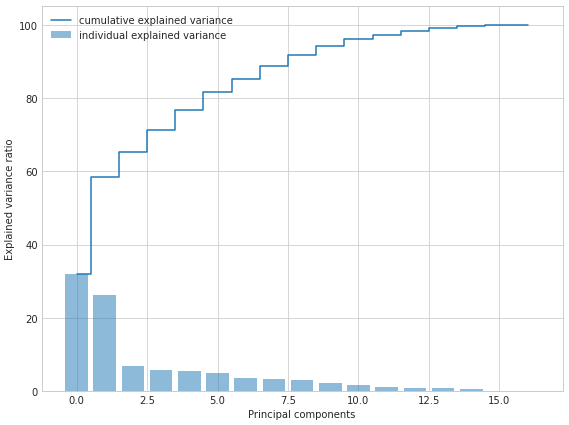

In [79]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(17), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(17), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()